In [44]:
#Usamos pandas para la manipulación de los datos
import pandas as pd
#Leemos los datos del csv
features = pd.read_csv('temps_3.csv')
features.head(10)

,year,month,day,week,temp_2,temp_1,average,actual
0,2015,10,1,Thu,32.9,31.0,32.90,34.4
1,2015,10,2,Fri,31.0,34.4,31.00,34.5
2,2015,10,3,Sat,34.4,34.5,34.45,37.0
3,2015,10,4,Sun,34.5,37.0,35.75,37.2
4,2015,10,5,Mon,37.0,37.2,37.10,39.0
5,2015,10,6,Tue,37.2,39.0,38.10,39.2
6,2015,10,7,Wed,39.0,39.2,39.10,37.5
7,2015,10,8,Thu,39.2,37.5,38.35,35.6
8,2015,10,9,Fri,37.5,35.6,36.55,38.0
9,2015,10,10,Sat,35.6,38.0,36.80,37.8


In [45]:
print('Las dimensiones de nuestra muestra son:', features.shape)

Las dimensiones de nuestra muestra son: (124, 8)


In [46]:
#Descripción estadística para cada columna
features.describe()

,year,month,day,temp_2,temp_1,average,actual
count,124.00000,124.0,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2016.50000,10.0,16.000000,33.456452,33.465323,33.454839,33.497581
std,1.12257,0.0,8.980557,2.177947,2.177902,1.907457,2.170702
min,2015.00000,10.0,1.000000,26.000000,26.000000,27.500000,26.000000
25%,2015.75000,10.0,8.000000,32.275000,32.275000,32.225000,32.375000
50%,2016.50000,10.0,16.000000,33.600000,33.750000,33.500000,33.850000
75%,2017.25000,10.0,24.000000,35.000000,35.000000,34.500000,35.000000
max,2018.00000,10.0,31.000000,39.200000,39.200000,39.100000,39.200000


In [47]:
#get_dummies para codificar los datos categóricos
features = pd.get_dummies(features)
#Mostramos las primeras 5 filas de las últimas columbas
features.iloc[:,5:].head(5)

,average,actual,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
0,32.90,34.4,0,0,0,0,1,0,0
1,31.00,34.5,1,0,0,0,0,0,0
2,34.45,37.0,0,0,1,0,0,0,0
3,35.75,37.2,0,0,0,1,0,0,0
4,37.10,39.0,0,1,0,0,0,0,0


In [48]:
#Lo importamos para usar los arrays
import numpy as np
#equiquetas son los valores que queremos predecir
labels = np.array(features['actual'])
# axis 1 se refiere a la columna
#removemos lo que queremos predecir del dataframe
features = features.drop('actual', axis = 1)
#Se guardan los nombres de las colmnas para luego
feature_list = list(features.columns)
#Se convierte en np array
features = np.array(features)

In [49]:
#Codificación one-hot Uso de Scikit-learn para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#se dividen los datos en conjuntos de entrenamiento y prueba.
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.7, random_state = 10)

In [50]:
print('forma de las características del entrenamiento:', train_features.shape)
print('Forma de las etiquetas de entrenamiento:', train_labels.shape)
print('Forma de las características de prueba :', test_features.shape)
print('Forma de las etiquetas de prueba:' ,test_labels.shape)


forma de las características del entrenamiento: (37, 13)
Forma de las etiquetas de entrenamiento: (37,)
Forma de las características de prueba : (87, 13)
Forma de las etiquetas de prueba: (87,)


In [51]:
# Las predicciones de referencia son los promedios históricos.
baseline_preds = test_features[:, feature_list.index('average')]
# Errores de referencia y visualización del error de referencia promedio
baseline_errors = abs(baseline_preds - test_labels)
print('Error de referencia promedio: ', round(np.mean(baseline_errors), 2))


Error de referencia promedio:  1.43


In [52]:
# Importamos el modelo que estamos usando.
from sklearn.ensemble import RandomForestRegressor
# Instanciamos el modelo con 100 árboles de decisión.
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Se ntrena el modelo con datos de entrenamiento.
rf.fit(train_features, train_labels);

In [53]:
# Utilizamos el método de predicción del forest en los datos de prueba.
predictions = rf.predict(test_features)
# Calculamos los errores absolutos.
errors = abs(predictions - test_labels)
# Imprimimos el error absoluto medio (mae)
print('Error Absoluto Medio:', round(np.mean(errors), 2), 'degrees.')


Error Absoluto Medio: 1.52 degrees.


In [54]:
# Calculamos el error porcentual absoluto medio (MAPE)
mape = 100 * (errors / test_labels)
# Calculamos y mostramos la precisión
accuracy = 100 - np.mean(mape)
print('Presición:', round(accuracy, 2), '%.')


Presición: 95.33 %.


In [55]:
# Se importan herramientas necesarias para la visualización.
from sklearn.tree import export_graphviz
import pydot
# Se saca un árbol del bosque.
tree = rf.estimators_[5]
# Exportar la imagen a un archivo dot
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Utiliza un archivo dot para crear un gráfico
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Escribir gráfico en un archivo png
graph.write_png('tree.png')

In [56]:
# Limitar la profundidad del árbol a 3 niveles.
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# extrae el árbol pequeño
tree_small = rf_small.estimators_[5]
# Guarde el árbol como una imagen png
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [57]:
# Obtener la importancia de las características numéricas
importances = list(rf.feature_importances_)
# Lista de tuplas con variable e importancia.
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Ordene las características importantes primero por las más importantes
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Imprime la característica y las importancias.
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: average              Importance: 0.32
Variable: day                  Importance: 0.16
Variable: temp_1               Importance: 0.15
Variable: temp_2               Importance: 0.13
Variable: week_Wed             Importance: 0.08
Variable: year                 Importance: 0.06
Variable: week_Mon             Importance: 0.06
Variable: week_Fri             Importance: 0.01
Variable: week_Sat             Importance: 0.01
Variable: week_Sun             Importance: 0.01
Variable: week_Thu             Importance: 0.01
Variable: month                Importance: 0.0
Variable: week_Tue             Importance: 0.0


In [58]:
# Nuevo bosque aleatorio con solo las dos variables más importantes
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extrae las dos características más importantes.
important_indices = [feature_list.index('day'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# entrena el random forest
rf_most_important.fit(train_important, train_labels)
# Hacer predicciones y determinar el error.
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Mostrar las métricas de rendimiento
print('Error absoluto medio:', round(np.mean(errors), 2), 'grados.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Presición:', round(accuracy, 2), '%.')

Error absoluto medio: 1.58 grados.
Presición: 95.14 %.


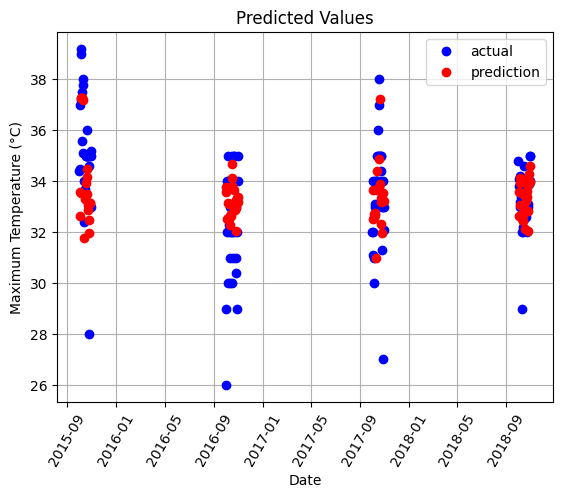

In [59]:
# Utilizamos datetime para crear objetos de fecha para plotear
import datetime
import matplotlib.pyplot as plt
# fechas de valores de entrenamiento
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# Listar y luego convertir a objeto datetime
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe con valores y fechas reales
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Fechas de predicciones
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# columna de fechas
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convertir a objetos datetime
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe con predicciones y fechas
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot de los valores actual
plt.plot(true_data['date'], true_data['actual'], 'bo', label = 'actual')
# Plot de los valores predichos

plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60);
plt.grid(True)
plt.legend()
# Grafico de las etiquetas
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (°C)'); plt.title('Predicted Values');